In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lab.torch as B
import torch

In [2]:
from dgp import DGP, generate_data, split_data_clients, dgp1

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
B.default_dtype = torch.float32
B.epsilon = 0.0
key = B.create_random_state(B.default_dtype, seed=0)
torch.set_printoptions(precision=10, sci_mode=False)

In [11]:
key = B.create_random_state(B.default_dtype, seed=0)

n = 100
key, m1 = B.randn(key, B.default_dtype, n)
key, m2 = B.randn(key, B.default_dtype, n)
key, L1 = B.randn(key, B.default_dtype, n, n)
key, L2 = B.randn(key, B.default_dtype, n, n)
C1, C2 = B.mm(L1, B.transpose(L1)), B.mm(L2, B.transpose(L2))

# sample = self.mean + B.cholsolve(B.chol(self.prec), noise) # Cholsolve, wrong

# Non-centered, precision parameterization
%timeit B.triangular_solve(B.T(B.chol(C1)), m1[..., None], lower_a=False)

130 µs ± 959 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%timeit B.cholsolve(B.chol(C1), m1[..., None])

127 µs ± 1.47 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
key, x, y, x_tr, y_tr, x_te, y_te, scale = generate_data(key, DGP.uci_adult)


adult dataset already exists!
Input  shape: (48842, 108)
Output shape: (48842, 1)


In [6]:
from data.split_data import generate_clients_data

In [8]:
y_tr = torch.squeeze(torch.nn.functional.one_hot(y_tr.long(), num_classes=2))
y_te = torch.squeeze(torch.nn.functional.one_hot(y_te.long(), num_classes=2))

tensor([[0, 1],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]])

In [30]:
seed = 0
client_size_factor = 0.9
class_balance_factor = 0.95
num_clients = 10

client_data, N, prop_positive, _ = generate_clients_data(x_tr, y_tr, num_clients, client_size_factor, class_balance_factor, seed)

torch.Size([9363])
torch.Size([29710])


In [37]:
client_data[2]['x'].shape

(7423,)

In [87]:
# Setup regression dataset.
N = 40  # num/fraction training points
key, x, y, x_tr, y_tr, x_te, y_te, scale = generate_data(key, DGP.ober_regression, N, xmin=-4.0, xmax=4.0)
x_tr = x_tr.cpu()
y_tr = y_tr.cpu()
x_te = x_te.cpu()
y_te = y_te.cpu()

In [92]:
key, x, y, x_tr, y_tr, x_te, y_te, scale = generate_data(key, DGP.ober_regression, N, xmin=-4.0, xmax=4.0)

# Normalize data.
y_tr_scale = B.std(y_tr)
x_tr_scale = B.std(x_tr)
x_te /= x_tr_scale
x_tr /= x_tr_scale
y_tr /= y_tr_scale
y_te /= y_tr_scale
x /= x_tr_scale
y /= y_tr_scale
# x /= x.std()
# y /= y.std()
scale = y_tr.std()

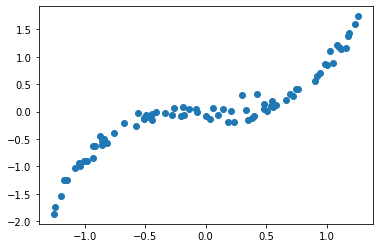

In [93]:
plt.scatter(x, y)

In [55]:
xmin = -4
xmax = 4
size = N
key, xl, yl = dgp1(key, int(size / 2), xmin, xmin + ((xmax - xmin) / 4))
key, xr, yr = dgp1(key, int(size / 2), xmax - ((xmax - xmin) / 4), xmax)
key, x_te, y_te = dgp1(key, size, xmin + ((xmax - xmin) / 4), xmax - ((xmax - xmin) / 4))

x_all = B.concat(xl, x_te, xr, axis=0)
y_all = B.concat(yl, y_te, yr, axis=0)
x_tr = B.concat(xl, xr, axis=0)
y_tr = B.concat(yl, yr, axis=0)

print(B.std(y_all))
print(B.std(y_tr))

tensor(25.4764633179)
tensor(35.3837623596)


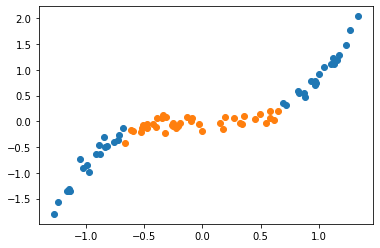

In [82]:
plt.scatter(x=x_tr/B.std(x_tr), y=y_tr/B.std(y_tr))
plt.scatter(x=x_te/B.std(x_tr), y=y_te/B.std(y_tr))

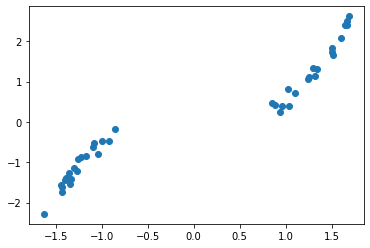

In [59]:
plt.scatter(x=x_tr/B.std(x_all), y=y_tr/B.std(y_all))

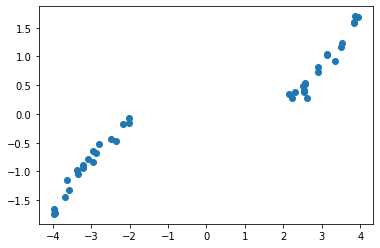

In [30]:
plt.scatter(x=x_tr, y=y_tr/B.std(y_tr))

<function matplotlib.pyplot.show(close=None, block=None)>

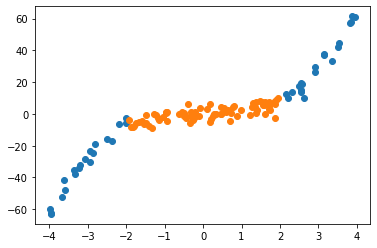

In [40]:
plt.scatter(x=x_tr, y=y_tr)
plt.scatter(x=x_te, y=y_te)
plt.show

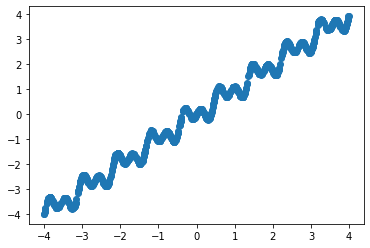

In [11]:
key, x2, y2 , e1, e2 = generate_data2(key, 1000, -4, 4)

x_tr, y_tr, x_te, y_te = split_data(x2, y2)

x2 = x2.cpu()
y2 = y2.cpu()
e1 = e1.cpu()
e2 = e2.cpu()

plt.scatter(x2, y2)
plt.show()